In [1]:
!pip install diffusers
import torch
from diffusers.utils import load_image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score

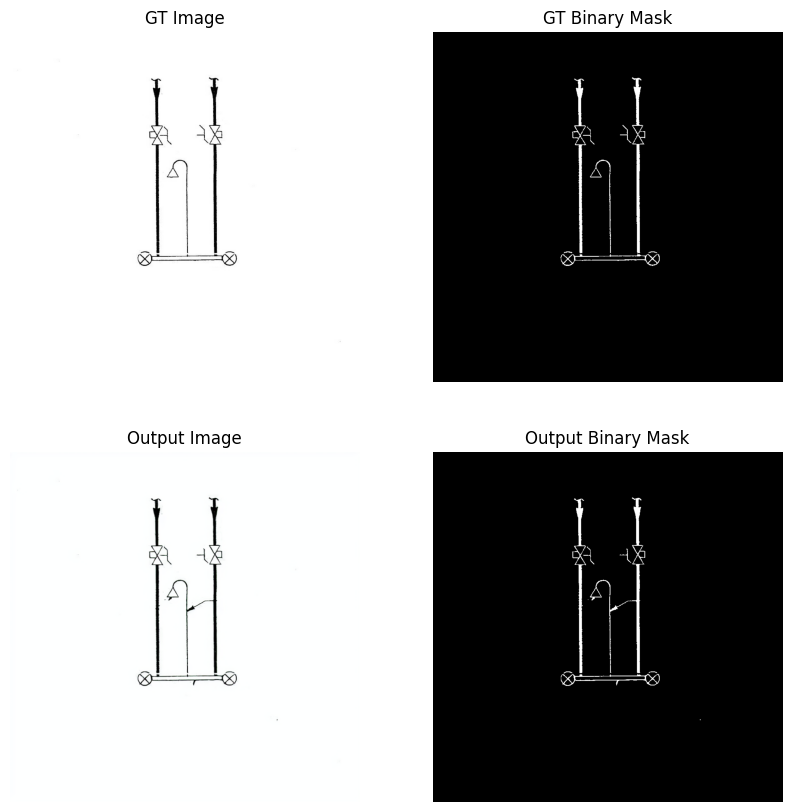

IoU: 0.8897
DICE: 0.9416
Recall: 0.9568
Precision: 0.9269
AUC-PR: 0.9716


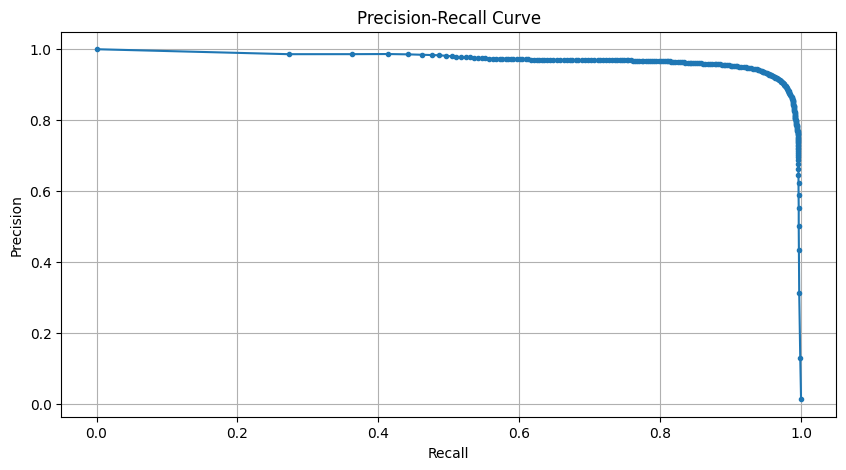

In [11]:
from PIL import Image
import numpy as np
from skimage.filters import threshold_otsu
from sklearn.metrics import recall_score, precision_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

def image_to_binary_mask(image):
    grayscale = np.array(image.convert("L"))
    threshold = threshold_otsu(grayscale)
    binary_mask = grayscale > threshold
    return binary_mask.astype(np.uint8)

def calculate_iou(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    union = np.logical_or(gt_mask, pred_mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou

def calculate_dice(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    dice = 2 * np.sum(intersection) / (np.sum(gt_mask) + np.sum(pred_mask))
    return dice

# Load images
image_gt = Image.open('148.png')
output = Image.open('148.png_cleaned.png').resize(image_gt.size)

gt_binary_mask = 1 - image_to_binary_mask(image_gt)
output_binary_mask = 1 - image_to_binary_mask(output)

# Display the original and enhanced images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(image_gt)
axes[0, 0].set_title('GT Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(gt_binary_mask, cmap='gray')
axes[0, 1].set_title('GT Binary Mask')
axes[0, 1].axis('off')

axes[1, 0].imshow(output)
axes[1, 0].set_title('Output Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(output_binary_mask, cmap='gray')
axes[1, 1].set_title('Output Binary Mask')
axes[1, 1].axis('off')

plt.show()


# Metrics computation
iou = calculate_iou(gt_binary_mask, output_binary_mask)
dice = calculate_dice(gt_binary_mask, output_binary_mask)
Recall = recall_score(gt_binary_mask.flatten(), output_binary_mask.flatten(), average='binary')
Precision = precision_score(gt_binary_mask.flatten(), output_binary_mask.flatten(), average='binary')

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(gt_binary_mask.flatten(), 1-(np.array(output.convert("L")).flatten() / 255.0))
auc_pr = auc(recall, precision)

# Display results
print(f"IoU: {iou:.4f}")
print(f"DICE: {dice:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


# For processing more than one image.

In [12]:
import os
from PIL import Image
import numpy as np
from skimage.filters import threshold_otsu
from sklearn.metrics import recall_score, precision_score, precision_recall_curve, auc

# Define functions
def image_to_binary_mask(image):
    grayscale = np.array(image.convert("L"))
    threshold = threshold_otsu(grayscale)
    binary_mask = grayscale > threshold
    return binary_mask.astype(np.uint8)

def calculate_iou(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    union = np.logical_or(gt_mask, pred_mask)
    return np.sum(intersection) / np.sum(union)

def calculate_dice(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    return 2 * np.sum(intersection) / (np.sum(gt_mask) + np.sum(pred_mask))

# Paths to the folders
ground_truth_folder = "gt"
cleaned_images_folder = "output" # names should be same as the gt images

# Initialize accumulators for metrics
iou_list = []
dice_list = []
recall_list = []
precision_list = []
auc_pr_list = []

# Process each image pair
for gt_filename in os.listdir(ground_truth_folder):
    gt_path = os.path.join(ground_truth_folder, gt_filename)
    cleaned_path = os.path.join(cleaned_images_folder, gt_filename)

    if os.path.exists(cleaned_path):  # Ensure the cleaned image exists
        # Load images
        image_gt = Image.open(gt_path)
        output = Image.open(cleaned_path).resize(image_gt.size)

        # Convert to binary masks
        gt_binary_mask = 1 - image_to_binary_mask(image_gt)
        output_binary_mask = 1 - image_to_binary_mask(output)

        # Compute metrics
        iou = calculate_iou(gt_binary_mask, output_binary_mask)
        dice = calculate_dice(gt_binary_mask, output_binary_mask)
        recall = recall_score(gt_binary_mask.flatten(), output_binary_mask.flatten(), average='binary')
        precision = precision_score(gt_binary_mask.flatten(), output_binary_mask.flatten(), average='binary')

        # Precision-Recall Curve and AUC-PR
        output_gray = 1 - (np.array(output.convert("L")).flatten() / 255.0)
        precision_curve, recall_curve, _ = precision_recall_curve(gt_binary_mask.flatten(), output_gray)
        auc_pr = auc(recall_curve, precision_curve)

        # Append metrics to accumulators
        iou_list.append(iou)
        dice_list.append(dice)
        recall_list.append(recall)
        precision_list.append(precision)
        auc_pr_list.append(auc_pr)

# Calculate averages
average_iou = np.mean(iou_list)
average_dice = np.mean(dice_list)
average_recall = np.mean(recall_list)
average_precision = np.mean(precision_list)
average_auc_pr = np.mean(auc_pr_list)

# Display average metrics
print(f"Average IoU: {average_iou:.4f}")
print(f"Average DICE: {average_dice:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average AUC-PR: {average_auc_pr:.4f}")


Average IoU: 0.7273
Average DICE: 0.8352
Average Recall: 0.9142
Average Precision: 0.7761
Average AUC-PR: 0.8470
